<a href="https://colab.research.google.com/github/vyasjahanvi6/sparks_task3/blob/main/sparks_task_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import  drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data Science & Business Analytics Task
# Task : Prediction using Decision Tree Algorithm
# Submitted By Jahanvi Vyas 


In [3]:
#imporing required libraries
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea


In [4]:
#reading the data file
iris=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
iris=iris.drop(['Id'],axis=1)
iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Exploring the Data**

In [5]:

iris.head()
print("rows",iris.shape[0])
print("columns",iris.shape[1])

rows 150
columns 5


In [6]:
#checking general information about file
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe(percentiles=[0.25,0.50,0.75,1])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
100%,7.900000,4.400000,6.900000,2.500000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#checking for null values
iris.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
col=iris.columns
print(col)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [10]:
num_col=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cat_col=['Species']

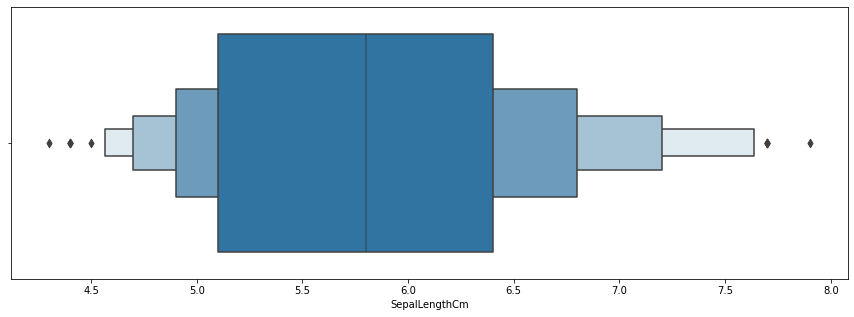

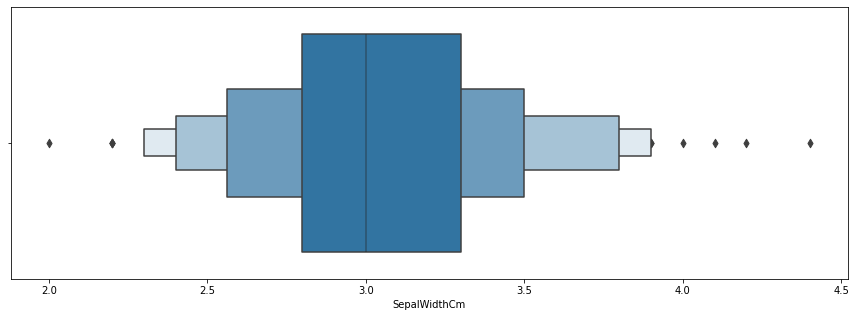

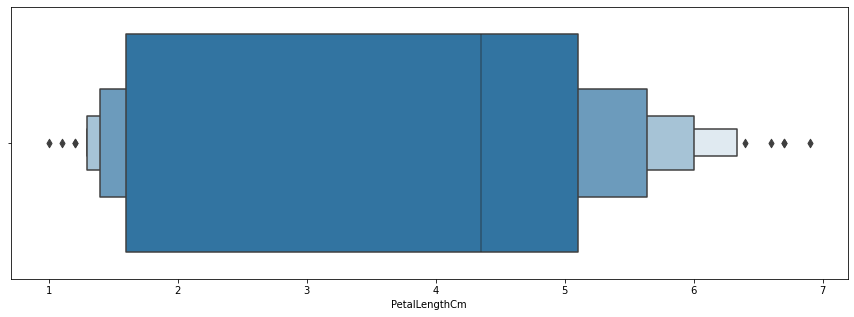

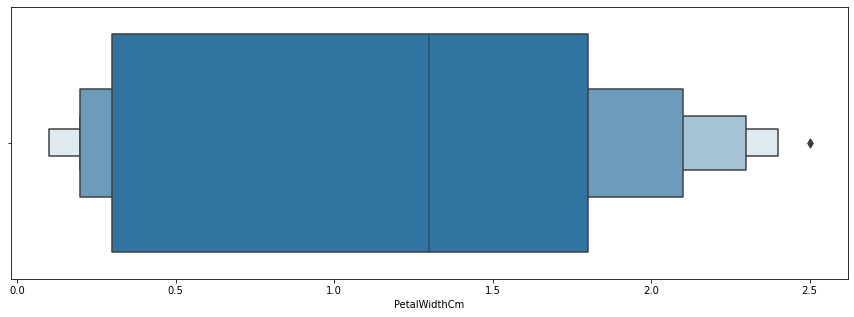

In [11]:
for i in num_col:
  plt.figure(figsize=(15,5))
  sea.boxenplot(x=i,data=iris)
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


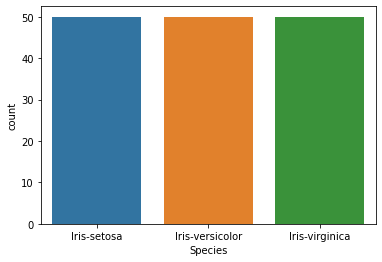

In [12]:
sea.countplot(iris['Species'])

In [13]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

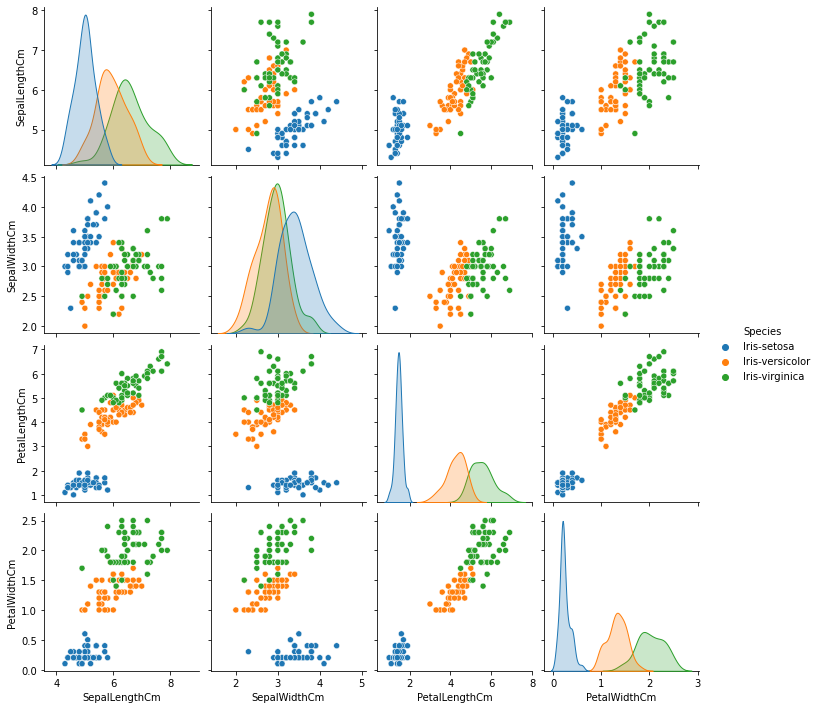

In [14]:
sea.pairplot(iris,hue='Species')

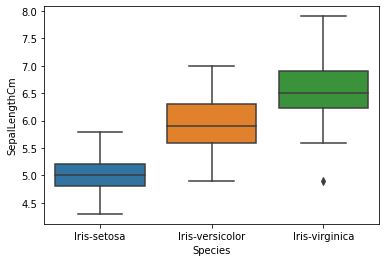

In [15]:
sea.boxplot(x='Species',y='SepalLengthCm',data=iris)

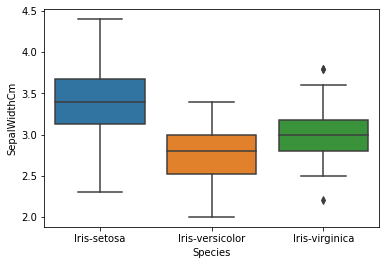

In [16]:
sea.boxplot(x='Species',y='SepalWidthCm',data=iris)

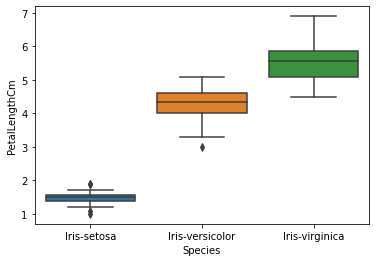

In [17]:
sea.boxplot(x='Species',y='PetalLengthCm',data=iris)

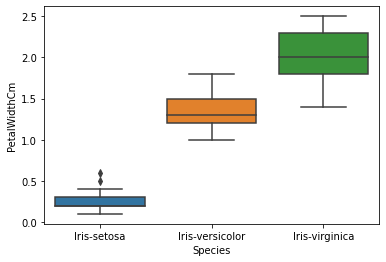

In [18]:
sea.boxplot(x='Species',y='PetalWidthCm',data=iris)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix

In [20]:
x=iris.iloc[:,iris.columns!='Species']
y=iris.iloc[:,iris.columns=='Species']

In [21]:
x.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


# **Spliting our data**

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [25]:
model=DecisionTreeClassifier()

# **Building a Decision Tree classifier**

In [27]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
y_pred=model.predict(x_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


In [29]:
print("Accuracy of decision tree:",accuracy_score(y_test, y_pred))


Accuracy of decision tree: 0.9666666666666667


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# **Visualizing Decision Tree**

In [34]:
from sklearn import tree
#tree_representation=tree.export_text(model)
#print(tree_representation)

[Text(1339.2, 1744.05, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(1004.4000000000001, 1426.9499999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(1674.0, 1426.9499999999998, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(669.6, 1109.85, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(334.8, 792.75, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(1004.4000000000001, 792.75, 'X[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(669.6, 475.6500000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(1339.2, 475.6500000000001, 'X[0] <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(1004.4000000000001, 158.55000000000018, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(1674.0, 158.55000000000018, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(2678.4, 1109.85, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(2343.6, 792.75, 'X[1] <

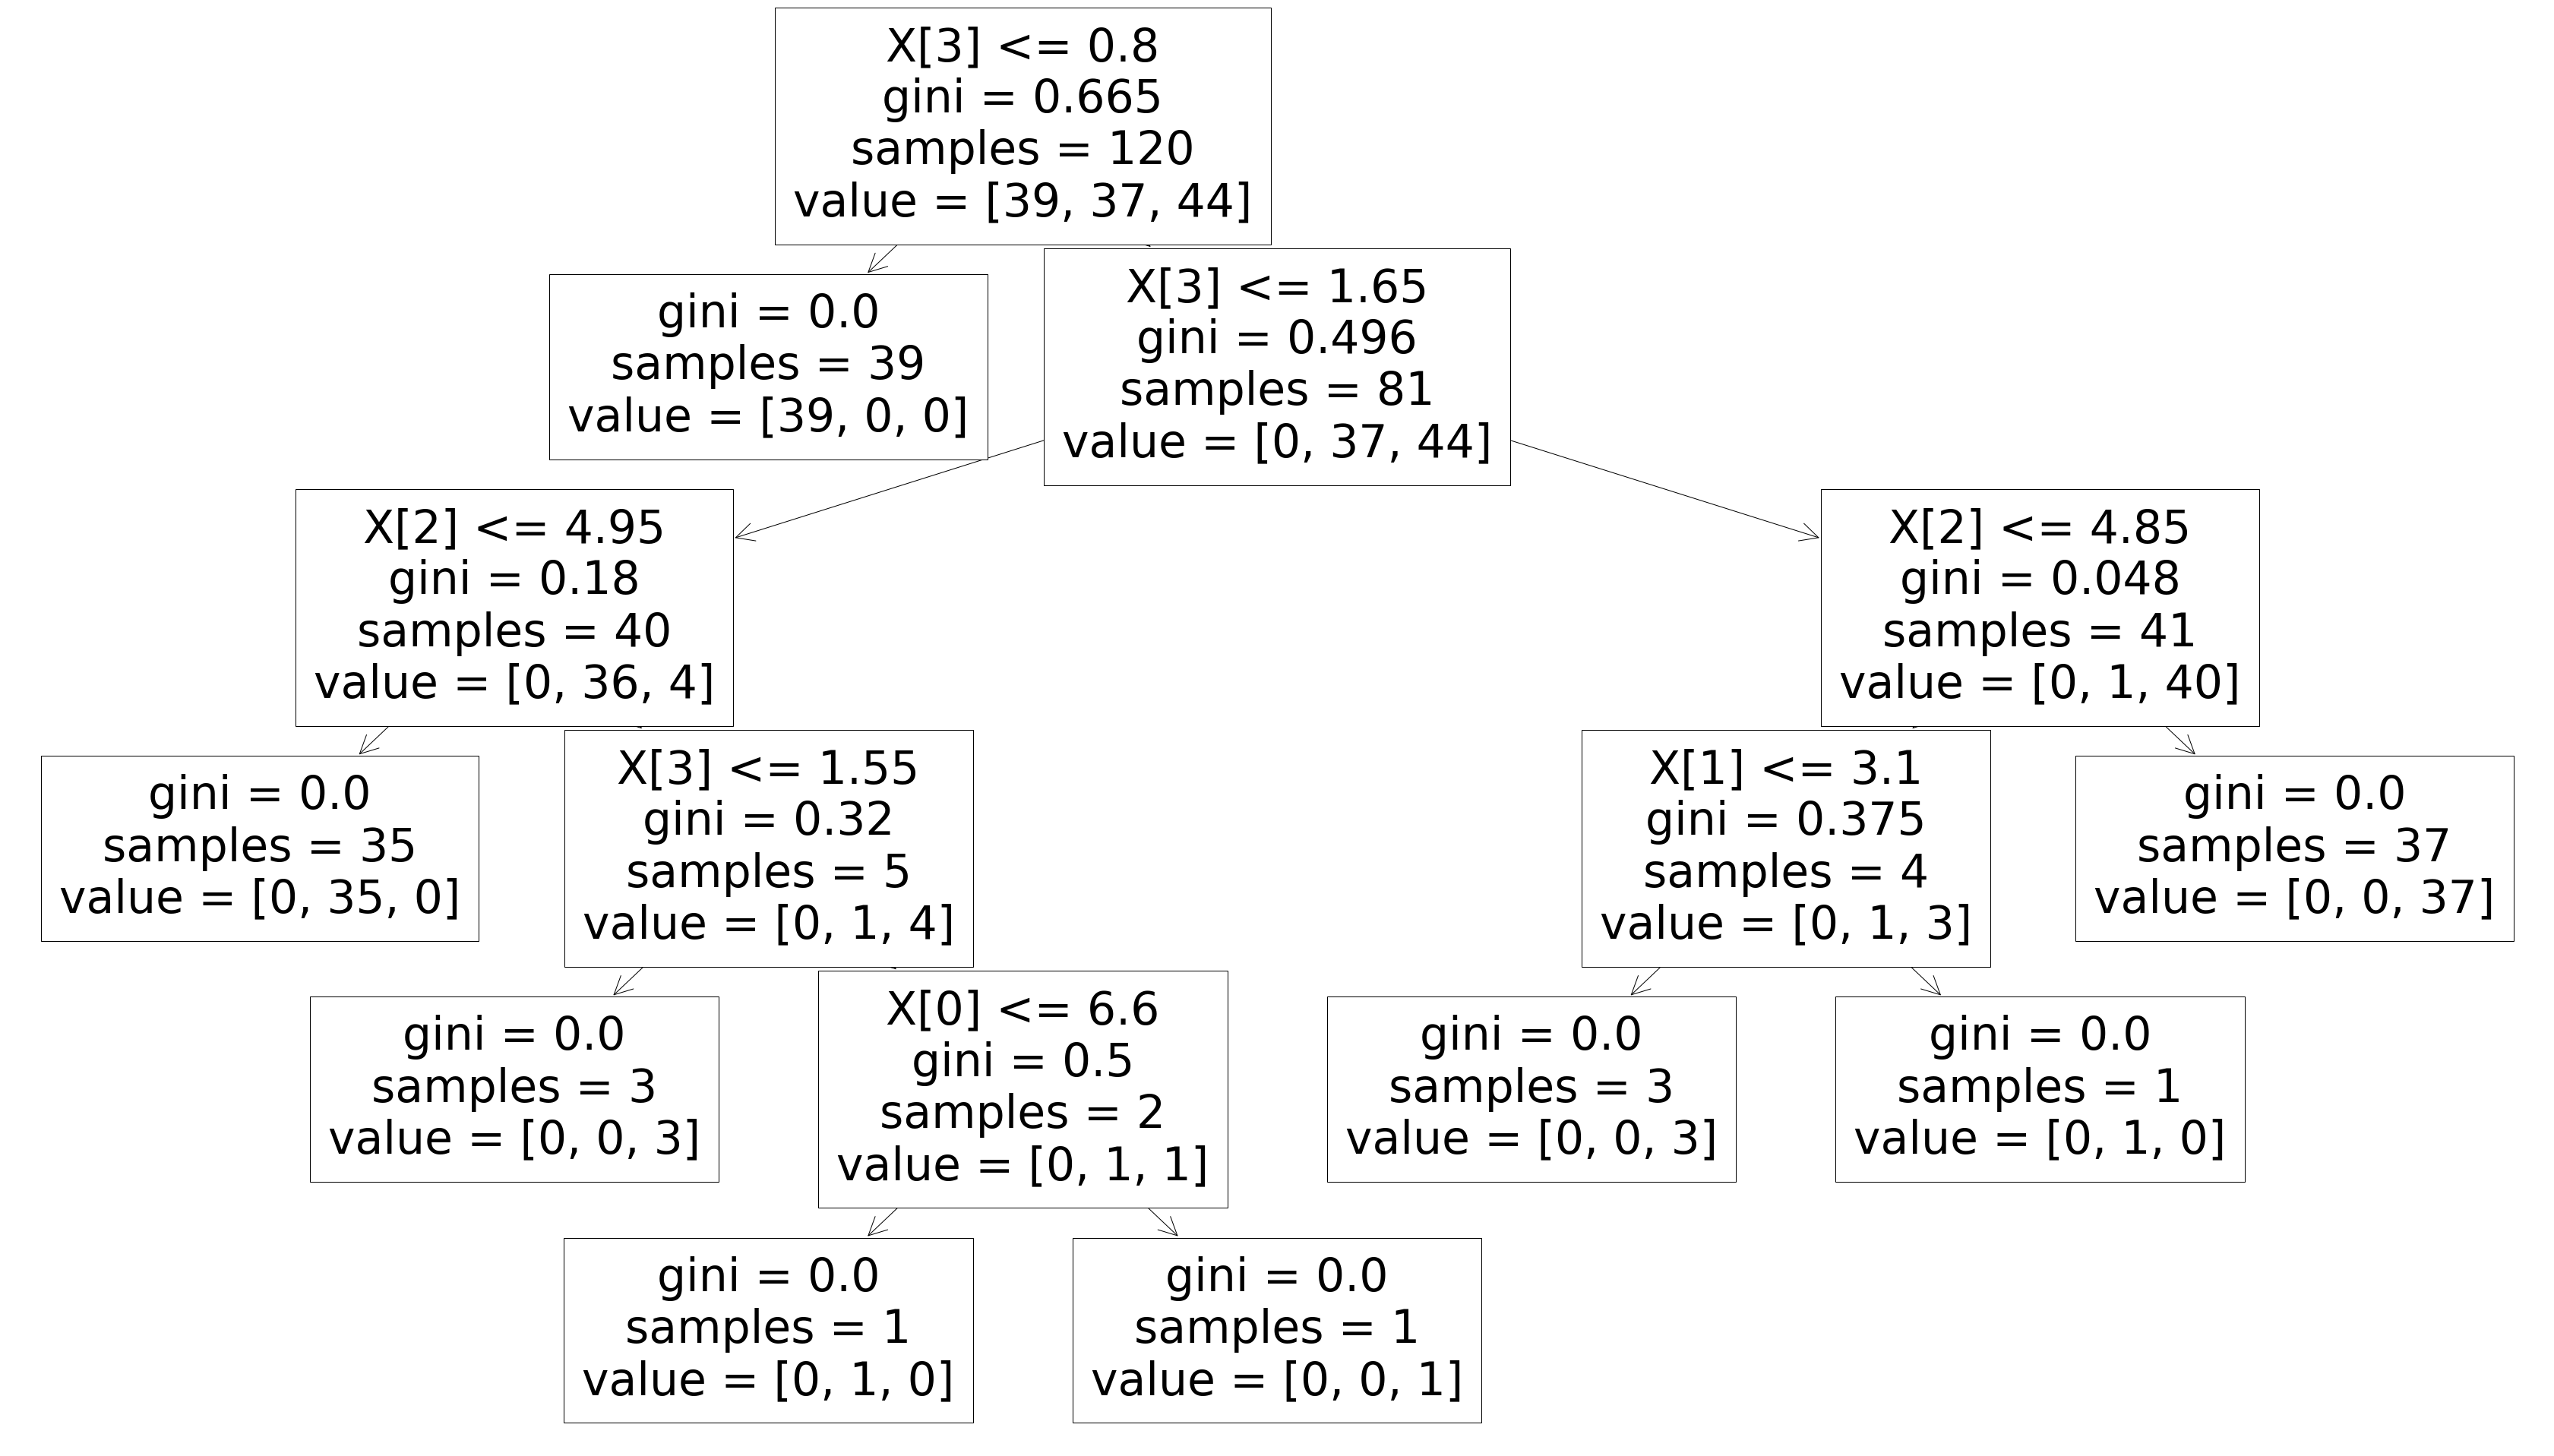

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,35))
tree.plot_tree(model)
#plot_tree(model,feature_names=iris[num_col],class_names=iris[cat_col],filled=True)